In [1]:
pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [5]:
db_file = 'sales_data.db'
csv_file = 'OnlineSalesData.csv'

In [29]:
conn = sqlite3.connect(db_file)

In [7]:
try:
    df = pd.read_csv(csv_file)
    print(f"CSV '{csv_file}' loaded successfully into pandas DataFrame.")
except FileNotFoundError:
    print(f"Error: CSV file '{csv_file}' not found. Please check the path.")
    conn.close()
    exit()

CSV 'OnlineSalesData.csv' loaded successfully into pandas DataFrame.


In [8]:
table_name = 'sales_table'

In [9]:
df.to_sql(table_name, conn, if_exists='replace', index=False)
print(f"Data from '{csv_file}' successfully imported into table '{table_name}' in '{db_file}'.")


Data from 'OnlineSalesData.csv' successfully imported into table 'sales_table' in 'sales_data.db'.


In [12]:
cursor = conn.cursor()
cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;") # Select first 5 rows
rows = cursor.fetchall()
print("\nFirst 5 rows from the new table:")
for row in rows:
    print(row)


First 5 rows from the new table:
(10001, '2024-01-01', 'Electronics', 'iPhone 14 Pro', 2, 999.99, 1999.98, 'North America', 'Credit Card')
(10002, '2024-01-02', 'Home Appliances', 'Dyson V11 Vacuum', 1, 499.99, 499.99, 'Europe', 'PayPal')
(10003, '2024-01-03', 'Clothing', "Levi's 501 Jeans", 3, 69.99, 209.97, 'Asia', 'Debit Card')
(10004, '2024-01-04', 'Books', 'The Da Vinci Code', 4, 15.99, 63.96, 'North America', 'Credit Card')
(10005, '2024-01-05', 'Beauty Products', 'Neutrogena Skincare Set', 1, 89.99, 89.99, 'Europe', 'PayPal')


In [22]:
cursor = conn.cursor()
cursor.execute(f"""SELECT count(distinct(`Transaction ID`)),
	    `Product Category`
        from {table_name}
        group by `Product Category`;""") 
rows = cursor.fetchall()
for row in rows:
    print(row)

(40, 'Beauty Products')
(40, 'Books')
(40, 'Clothing')
(40, 'Electronics')
(40, 'Home Appliances')
(40, 'Sports')


In [25]:
cursor = conn.cursor()
cursor.execute(f"""SELECT STRFTIME('%m', Date) AS Month, `Product Category`, SUM(`Total Revenue`) as Revenue
FROM {table_name}
GROUP BY Month, `Product Category`
ORDER BY Month, Revenue DESC;""") 
rows = cursor.fetchall()
for row in rows:
    print(row)

('01', 'Electronics', 7999.9)
('01', 'Home Appliances', 2169.94)
('01', 'Clothing', 1789.8400000000001)
('01', 'Sports', 1579.83)
('01', 'Beauty Products', 699.95)
('01', 'Books', 308.86)
('02', 'Sports', 2993.87)
('02', 'Electronics', 2899.88)
('02', 'Home Appliances', 2869.92)
('02', 'Clothing', 1284.81)
('02', 'Books', 422.90999999999997)
('02', 'Beauty Products', 331.98)
('03', 'Home Appliances', 5059.91)
('03', 'Electronics', 4499.9)
('03', 'Sports', 1609.8400000000001)
('03', 'Clothing', 1009.76)
('03', 'Beauty Products', 417.0)
('03', 'Books', 252.82999999999998)
('04', 'Electronics', 6709.91)
('04', 'Sports', 2559.8)
('04', 'Home Appliances', 1989.85)
('04', 'Clothing', 769.8)
('04', 'Books', 220.85)
('04', 'Beauty Products', 201.48)
('05', 'Electronics', 4198.96)
('05', 'Home Appliances', 1989.82)
('05', 'Sports', 1159.66)
('05', 'Clothing', 829.88)
('05', 'Books', 149.87)
('05', 'Beauty Products', 127.3)
('06', 'Electronics', 3599.93)
('06', 'Home Appliances', 1479.89)
('06',

In [27]:
cursor = conn.cursor()
cursor.execute(f"""SELECT sum(`Total Revenue`) as Total_Revenue,
    STRFTIME('%m', Date) AS Month 
    from {table_name}
    where `Date` between '2024-01-01 00:00:00' and '2024-08-27 00:00:00'
    group by `Month`
	order by `Total_Revenue` desc
    Limit 5;""") 
rows = cursor.fetchall()
for row in rows:
    print(row)

(12849.24, '03')
(12548.34, '01')
(12451.69, '04')
(10803.37, '02')
(8455.49, '05')


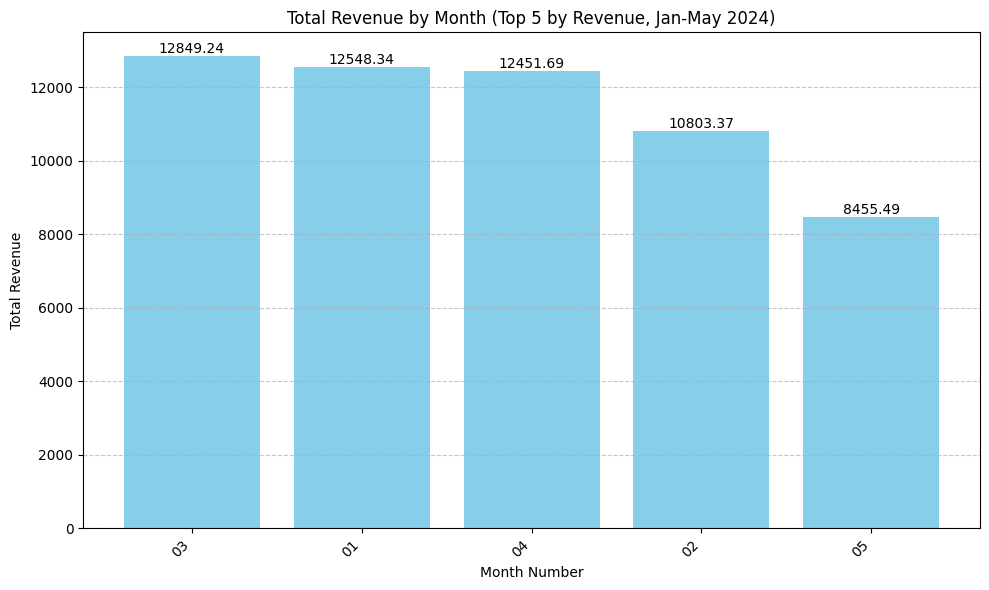

In [35]:
df2 = pd.DataFrame(rows, columns=['Total_Revenue', 'Month_Number'])
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

plt.bar(df2['Month_Number'], df2['Total_Revenue'], color='skyblue')

plt.xlabel('Month Number')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month (Top 5 by Revenue, Jan-May 2024)')
plt.xticks(rotation=45, ha='right')
for index, row in df2.iterrows():
    plt.text(row['Month_Number'], row['Total_Revenue'], f"{row['Total_Revenue']:.2f}",
             ha='center', va='bottom')
plt.tight_layout() 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()



In [36]:
conn.close()
print("Database connection closed.")

Database connection closed.
